<a href="https://colab.research.google.com/github/adihahaha/micrograd/blob/master/Another_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Micrograd with Softmax Demo

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP, Softmax

In [ ]:
from sklearn.datasets import make_moons, make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [ ]:
# generating a dataset

X, Y = make_classification(n_samples=150, n_features=2, n_classes=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=1.5, random_state=12)

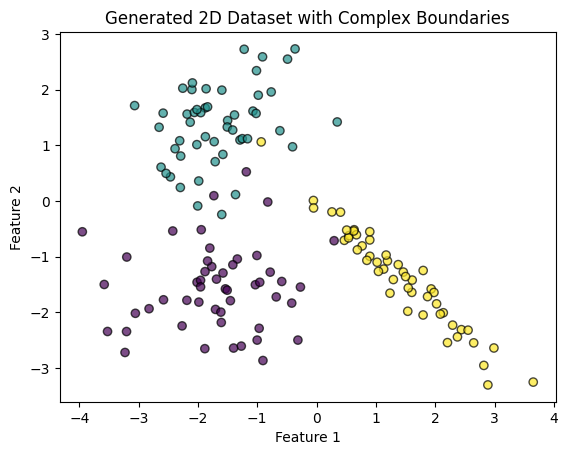

In [ ]:
# visualize the dataset in 2D

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Generated 2D Dataset with Complex Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
model_mlp = MLP(2, [16, 10, 5], activation_func='relu')  # 3 Layer MLP
model_softmax = Softmax(5, 3)                            # Softmax layer

In [ ]:
# loss function

def loss(batch_size=None):

    # inline data loader :)
    if batch_size is None:
        Xb, yb = X, Y

    # batches
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], Y[ri]

    # forward to get scores
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    _scores = list(map(model_mlp, inputs))
    scores = list(map(model_softmax, _scores))

    # multi-class hinge loss
    losses = []
    correct_predictions = 0
    for scorei, correct_idx in zip(scores, yb):
        score_correct = scorei[correct_idx]
        for j, scorej in enumerate(scorei):
            if j != correct_idx:
                losses.append((1 + scorej - score_correct).relu())
        # accuracy
        predicted_values = [score_values.data for score_values in scorei]
        predicted_idx = np.argmax([predicted_values])
        if predicted_idx == correct_idx:
            correct_predictions += 1

    # cost and accuracy
    data_loss = sum(losses) * (1.0 / len(yb))
    accuracy = correct_predictions / len(yb)

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model_mlp.parameters() + model_softmax.parameters()))
    total_loss = data_loss + reg_loss

    return total_loss, accuracy

In [ ]:
# optimization

for epoch in range(100):

    # forward pass
    total_loss, accuracy = loss()

    # backward pass
    total_loss.backward()

    # update parameters
    learning_rate = 0.1     # set after some fine tuning
    for p in model_mlp.parameters() + model_softmax.parameters():
        p.data -= learning_rate * p.grad
        p.grad = 0.00            # zero_grad

    if epoch % 1 == 0:
        print(f"step: {epoch+1}, loss: {total_loss.data:.4f}, accuracy: {accuracy*100:.2f}%")

step: 1, loss: 1.3343, accuracy: 64.00%
step: 2, loss: 1.1756, accuracy: 62.67%
step: 3, loss: 1.0923, accuracy: 63.33%
step: 4, loss: 1.0238, accuracy: 64.00%
step: 5, loss: 0.9512, accuracy: 72.67%
step: 6, loss: 0.8695, accuracy: 80.00%
step: 7, loss: 0.7873, accuracy: 84.67%
step: 8, loss: 0.7092, accuracy: 88.00%
step: 9, loss: 0.6383, accuracy: 90.00%
step: 10, loss: 0.5740, accuracy: 93.33%
step: 11, loss: 0.5195, accuracy: 94.67%
step: 12, loss: 0.4731, accuracy: 94.67%
step: 13, loss: 0.4341, accuracy: 94.67%
step: 14, loss: 0.4013, accuracy: 94.00%
step: 15, loss: 0.3729, accuracy: 94.00%
step: 16, loss: 0.3491, accuracy: 94.67%
step: 17, loss: 0.3286, accuracy: 94.67%
step: 18, loss: 0.3115, accuracy: 94.67%
step: 19, loss: 0.2972, accuracy: 94.67%
step: 20, loss: 0.2848, accuracy: 94.67%
step: 21, loss: 0.2740, accuracy: 94.67%
step: 22, loss: 0.2647, accuracy: 94.67%
step: 23, loss: 0.2565, accuracy: 95.33%
step: 24, loss: 0.2492, accuracy: 95.33%
step: 25, loss: 0.2427, a

(-4.304317745853133, 3.6456822541468856)

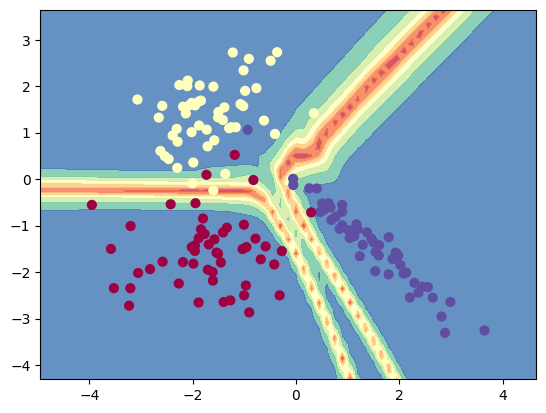

In [ ]:
h = 0.15
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]

inputs = [list(map(Value, xrow)) for xrow in Xmesh]
_scores = list(map(model_mlp, inputs))
scores = list(map(model_softmax, _scores))

maxes = []
for _row in scores:
    _ele = max([_el.data for _el in _row])
    maxes.append(_ele)

Z = np.array(maxes)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())